In [1]:
import numpy as np
import matplotlib.pylab as plt

from scipy import interpolate

from os.path import exists
import matplotlib as mpl
import sys
from matplotlib.lines import Line2D
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.colors as colors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from scipy.signal import savgol_filter
import h5py

In [2]:
def plot_interp(x,y):
#     time=x
#     tau_new=savgol_filter(y,20,3)
    f = interpolate.interp1d(x, y)
    time=np.linspace(x.min(),x.max(),300)
    tau_new= f(time)
    return time, tau_new

In [3]:
test=h5py.File('output/s20_0.75_hdf5_plt_cnt_0200')
time=test['real scalars'][2][-1]
r_shock=test['real scalars'][2][-1]
nblockx=test['integer runtime parameters'][74][-1]
nblocky=test['integer runtime parameters'][75][-1]
refine=test['integer runtime parameters'][62][-1]
print(refine,nblockx,nblocky)
print(1e9/((nblockx+nblocky)*2**(refine+1)),test['block size'][:,:].max()/12)
2e9/40

10 5 10
32552.083333333332 16666666.666666666


50000000.0

In [4]:
# list_files= ['s20_ref_Gang_SFHo_hr.dat']

list_files= !ls *SFHo*dat
# print(list_files)
# !ls -t *.npy
# list_files.remove('s20_ref_Gang_SFHo_hr.dat')
# list_files.remove('s20_simp_SFHo_Gang.dat')
# list_files.remove('s20_ref_Hann_SFHo_hr.dat')
# list_files.remove("s20_ref_Gang_SFHo_per.dat")
# list_files.append('s20_0.75.dat')
x=0
for i in list_files:
    if not exists('allprofiles'+i[:-5]+'.npy'):
        list_files.pop(x)
        continue
    print(i)
#     if i in 's20_simp_SFHo_Gang8.dat':
#         list_files.pop(x)
#         continue
    globals()[i]=np.load('allprofiles'+i[:-5]+'.npy',allow_pickle=True).item()
    x=x+1

s20_ref_Gang_SFHo8.dat
s20_ref_Gang_SFHo_hr8.dat
s20_ref_Gang_SFHo_new8.dat
s20_ref_Gang_SFHo_per.dat
s20_ref_Hann_SFHo8.dat
s20_ref_Hann_SFHo_hr8.dat
s20_ref_SFHo_nb78.dat
s20_simp_SFHo37.dat
s20_simp_SFHo_Gang7.dat
s20_simp_SFHo_Gang88.dat
s20_simp_SFHo_Gang_nr8.dat
s20_simp_SFHo_Hann88.dat


In [5]:
print(list_files)

['FLASH_Hann_ref_SFHo_1D.dat', 'FLASH_Hann_simp_SFHo_1D.dat', 's20_ref_Gang_SFHo8.dat', 's20_ref_Gang_SFHo_hr8.dat', 's20_ref_Gang_SFHo_new8.dat', 's20_ref_Gang_SFHo_per.dat', 's20_ref_Hann_SFHo8.dat', 's20_ref_Hann_SFHo_hr8.dat', 's20_ref_SFHo_nb78.dat', 's20_simp_SFHo37.dat', 's20_simp_SFHo_Gang7.dat', 's20_simp_SFHo_Gang88.dat', 's20_simp_SFHo_Gang_nr8.dat', 's20_simp_SFHo_Hann88.dat']


In [6]:
for i in list_files:
    print(i)
    if '8.dat' in i :
        globals()['alpha'+i]=1.
    elif '7.dat' in i :
        globals()['alpha'+i]=0.5
    else: 
        globals()['alpha'+i]=1.
    if 'ref' in i: 
        globals()['ticks'+i]='-'
    else:
        globals()['ticks'+i]='--'
        

    if ('Gang' in i) & ('SFHo' in i) : 
        globals()['color'+i]='orange'
        globals()['tb'+i]=0.300
    elif 'nr' in i :
        globals()['color'+i]='m'
    elif 'SFHo' in i :
        globals()['color'+i]='r'
        globals()['tb'+i]=0.300
    elif ('Gang' in i) & ('SRO' in i) : 
        globals()['color'+i]='g'
        globals()['tb'+i]= 0.319
    elif 'SRO' in i :
        globals()['color'+i]='b'
        globals()['tb'+i]= 0.319
      
    else:
        globals()['color'+i]='k'
        globals()['tb'+i]= 0.319
        print("case not found")
        

FLASH_Hann_ref_SFHo_1D.dat
FLASH_Hann_simp_SFHo_1D.dat
s20_ref_Gang_SFHo8.dat
s20_ref_Gang_SFHo_hr8.dat
s20_ref_Gang_SFHo_new8.dat
s20_ref_Gang_SFHo_per.dat
s20_ref_Hann_SFHo8.dat
s20_ref_Hann_SFHo_hr8.dat
s20_ref_SFHo_nb78.dat
s20_simp_SFHo37.dat
s20_simp_SFHo_Gang7.dat
s20_simp_SFHo_Gang88.dat
s20_simp_SFHo_Gang_nr8.dat
s20_simp_SFHo_Hann88.dat


In [7]:
globals()['color'+'s20_ref_Gang_SFHo_hr.dat']='m'

s20_ref_Gang_SFHo8.dat
s20_ref_Gang_SFHo_hr8.dat
s20_ref_Gang_SFHo_new8.dat
s20_ref_Gang_SFHo_per.dat
s20_ref_Hann_SFHo8.dat
s20_ref_Hann_SFHo_hr8.dat
s20_ref_SFHo_nb78.dat
s20_simp_SFHo37.dat
s20_simp_SFHo_Gang7.dat
s20_simp_SFHo_Gang88.dat
s20_simp_SFHo_Gang_nr8.dat
s20_simp_SFHo_Hann88.dat


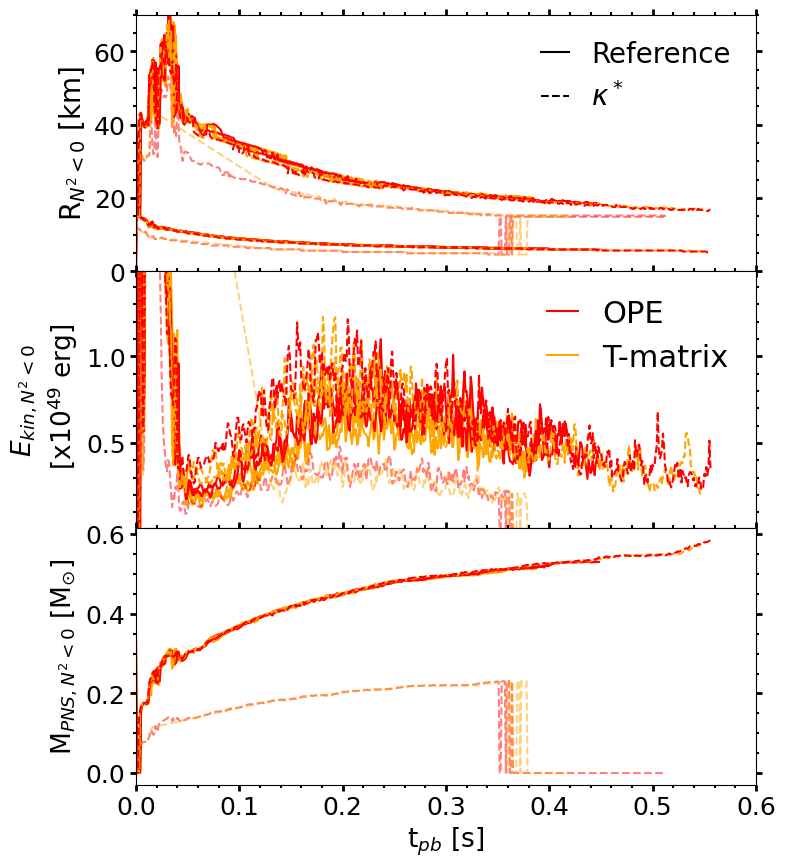

In [8]:
fig,ax=plt.subplots(3,1,figsize=(8,10))
for i in list_files:
    if not i in globals():
        continue
    # globals()[i]["time"][globals()[i]["time"]==0.]=np.nan
    globals()[i]["conv_max_rad"][globals()[i]["conv_max_rad"]==0.]=np.nan
    globals()[i]["kin_erg"][globals()[i]["kin_erg"]==0.]=np.nan

    # if 'conv_min_rad' in globals()[i].keys():c
    print(i)
    # time_range = np.linspace(0,len(globals()[i]["kin_erg"]),len(globals()[i]["kin_erg"]))
    # time_range=(time_range-320)*1e-3
    # interp_t,interp_val=plot_interp(globals()[i]["time"],globals()[i]["kin_erg"])
    ax[1].plot(globals()[i]["time"]-globals()['tb'+i],globals()[i]["kin_erg"]/1e49,color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i])    
    ax[0].plot(globals()[i]["time"]-globals()['tb'+i],globals()[i]["conv_max_rad"],color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i],label=i)        
    ax[0].plot(globals()[i]["time"]-globals()['tb'+i],globals()[i]["conv_min_rad"],color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i])
    ax[2].plot(globals()[i]["time"]-globals()['tb'+i],globals()[i]["total_mass"]/2e33,color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i])    

#         plt.legend()  
# ax[1].set_xlabel('t$_{pb}$ [s]',fontsize=24)
# ax[2].set_xlabel('t$_{pb}$ [s]',fontsize=24)
ax[0].set_ylabel('R$_{N^2<0}$ [km]',fontsize=20)
ax[1].set_ylabel(r'$E_{kin,N^2<0}$' +'\n'+' [x10$^{49}$ erg]',fontsize=19)
ax[2].set_xlabel('t$_{pb}$ [s]',fontsize=19)
ax[2].set_ylabel('M$_{PNS,N^2<0}$ [M$_{\odot}$]',fontsize=19)
ax[0].set_xlim([0,0.6])
ax[1].set_xlim([0,0.6])
ax[2].set_xlim([0,0.6])
ax[1].set_ylim([0.01,1.49])
ax[0].set_ylim([0,70])
black_line1, = ax[0].plot([], [], color='k', linestyle='-')
black_line2, = ax[0].plot([], [], color='k', linestyle='--')
ax[0].legend([black_line1,black_line2],[r"Reference",r"$\kappa^*$"],fontsize=20,handlelength=1,frameon=False,loc= "upper right")

black_line1, = plt.plot([], [], color='r', linestyle='-')
black_line2, = plt.plot([], [], color='orange', linestyle='-')
leg=ax[1].legend([black_line1,black_line2],[r"OPE",r"T-matrix"],fontsize=22,handlelength=1,title_fontsize=20,frameon=False,loc= "upper right")
plt.subplots_adjust(wspace=0,hspace=0.)
ax[0].set_xticklabels([])    
ax[1].set_xticklabels([])    

for z in range(3) : 

    ax[z].xaxis.set_minor_locator(AutoMinorLocator())
    ax[z].yaxis.set_minor_locator(AutoMinorLocator())

    ax[z].yaxis.set_ticks_position('both')
    ax[z].xaxis.set_ticks_position('both')

    ax[z].tick_params(axis='both', which='major', labelsize=18,width=2,length=4)
    ax[z].tick_params(axis='both', which='minor', labelsize=18,width=1.5,length=2)



s20_ref_Gang_SFHo8.dat
s20_ref_Gang_SFHo_hr8.dat
s20_ref_Gang_SFHo_new8.dat
s20_ref_Gang_SFHo_per.dat
s20_ref_Hann_SFHo8.dat
s20_ref_Hann_SFHo_hr8.dat
s20_ref_SFHo_nb78.dat
s20_simp_SFHo37.dat
s20_simp_SFHo_Gang7.dat
s20_simp_SFHo_Gang88.dat
s20_simp_SFHo_Gang_nr8.dat
s20_simp_SFHo_Hann88.dat


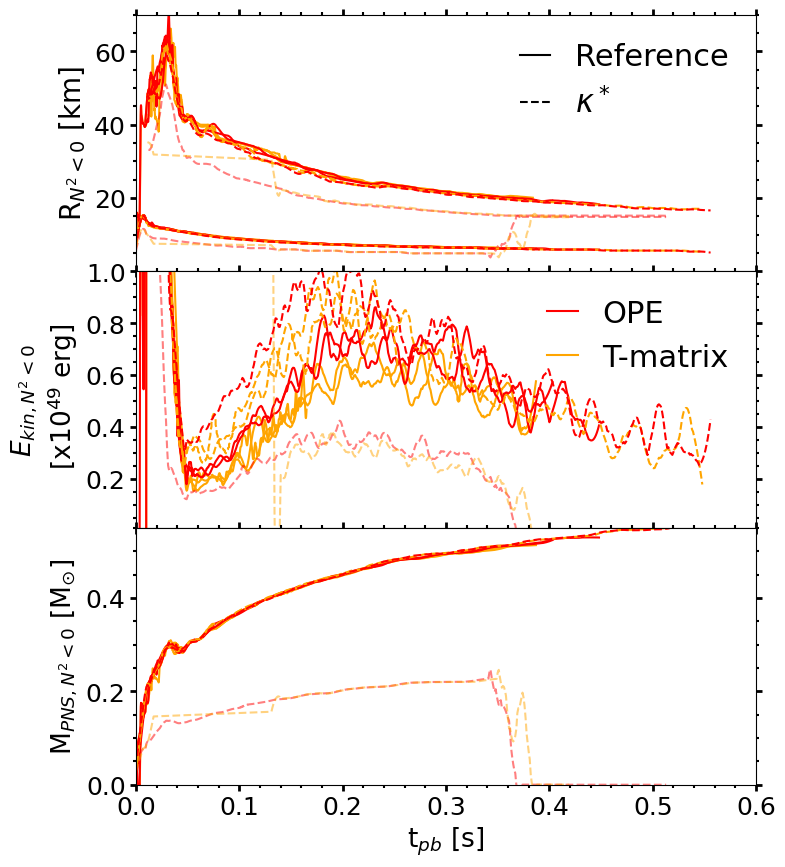

In [12]:
fig,ax=plt.subplots(3,1,figsize=(8,10))
for i in list_files:
    if not i in globals():
        continue
    if not 'r_shock_in' in globals()[i].keys():
        continue
    globals()[i]["time"][globals()[i]["time"]==0.]=np.nan
    globals()[i]["conv_max_rad"][globals()[i]["conv_max_rad"]==0.]=np.nan
    globals()[i]["kin_erg"][globals()[i]["kin_erg"]==0.]=np.nan

    # if 'conv_min_rad' in globals()[i].keys():c
    print(i)
    time_range = np.linspace(0,len(globals()[i]["kin_erg"]),len(globals()[i]["kin_erg"]))
    time_range=(time_range-320)*1e-3
    ax[1].plot(globals()[i]["time"]-globals()['tb'+i],savgol_filter(globals()[i]["kin_erg"]/1e49,20,2),color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i])    
    ax[0].plot(globals()[i]["time"]-globals()['tb'+i],savgol_filter(globals()[i]["conv_max_rad"],20,2),color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i],label=i)        
    ax[0].plot(globals()[i]["time"]-globals()['tb'+i],savgol_filter(globals()[i]["conv_min_rad"],20,2),color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i])
    ax[2].plot(globals()[i]["time"]-globals()['tb'+i],savgol_filter(globals()[i]["total_mass"],20,2)/2e33,color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i])    

#         plt.legend()  
# ax[1].set_xlabel('t$_{pb}$ [s]',fontsize=24)
# ax[0].set_xlabel('t$_{pb}$ [s]',fontsize=24)
ax[0].set_ylabel('R$_{N^2<0}$ [km]',fontsize=20)
ax[1].set_ylabel(r'$E_{kin,N^2<0}$' +'\n'+' [x10$^{49}$ erg]',fontsize=19)
ax[2].set_xlabel('t$_{pb}$ [s]',fontsize=19)
ax[2].set_ylabel('M$_{PNS,N^2<0}$ [M$_{\odot}$]',fontsize=19)
ax[0].set_xlim([0,0.6])
ax[1].set_xlim([0,0.6])
ax[2].set_xlim([0,0.6])
ax[1].set_ylim([0.01,1])
ax[0].set_ylim([0.01,70])

ax[2].set_ylim([0,0.55])


plt.subplots_adjust(wspace=0,hspace=0.)
ax[0].set_xticklabels([])    
ax[1].set_xticklabels([]) 


black_line1, = ax[0].plot([], [], color='k', linestyle='-')
black_line2, = ax[0].plot([], [], color='k', linestyle='--')
ax[0].legend([black_line1,black_line2],[r"Reference",r"$\kappa^*$"],fontsize=22,handlelength=1,frameon=False,loc= "upper right")

black_line1, = plt.plot([], [], color='r', linestyle='-')
black_line2, = plt.plot([], [], color='orange', linestyle='-')
leg=ax[1].legend([black_line1,black_line2],[r"OPE",r"T-matrix"],fontsize=22,handlelength=1,title_fontsize=22,frameon=False,loc= "upper right")

   
for z in range(3) : 

    ax[z].xaxis.set_minor_locator(AutoMinorLocator())
    ax[z].yaxis.set_minor_locator(AutoMinorLocator())

    ax[z].yaxis.set_ticks_position('both')
    ax[z].xaxis.set_ticks_position('both')

    ax[z].tick_params(axis='both', which='major', labelsize=18,width=2,length=4)
    ax[z].tick_params(axis='both', which='minor', labelsize=18,width=1.5,length=2)



s20_ref_Gang_SFHo8.dat
s20_ref_Gang_SFHo_hr8.dat
s20_ref_Gang_SFHo_new8.dat
s20_ref_Gang_SFHo_per.dat
s20_ref_Hann_SFHo8.dat
s20_ref_Hann_SFHo_hr8.dat
s20_ref_SFHo_nb78.dat
s20_simp_SFHo37.dat
s20_simp_SFHo_Gang7.dat
s20_simp_SFHo_Gang88.dat
s20_simp_SFHo_Gang_nr8.dat
s20_simp_SFHo_Hann88.dat


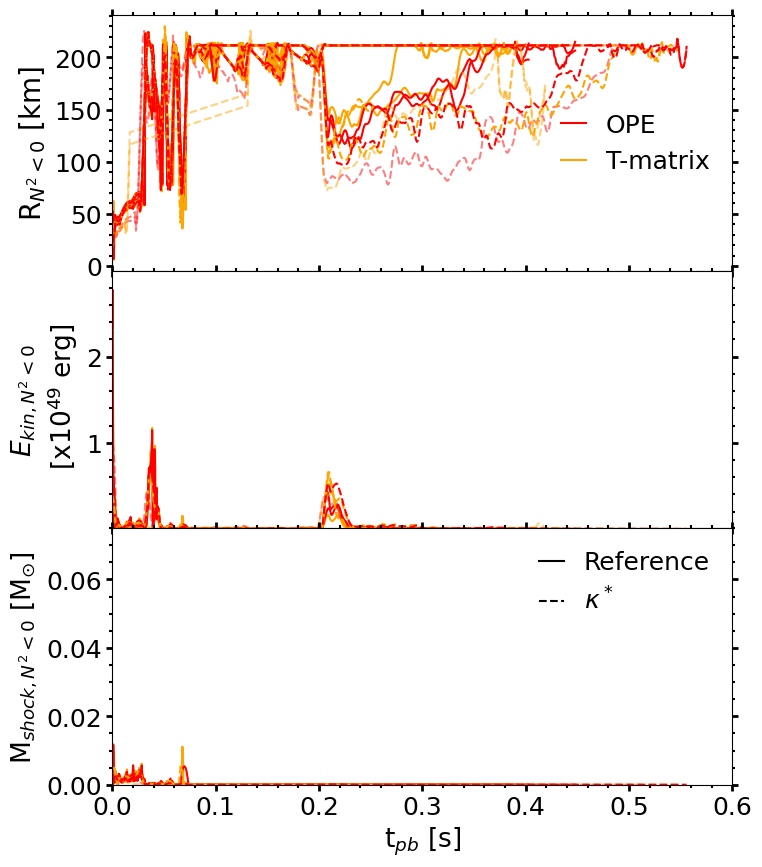

In [10]:
fig,ax=plt.subplots(3,1,figsize=(8,10))
for i in list_files:
    if not i in globals():
        continue
    if not 'r_shock_in' in globals()[i].keys():
        continue
    globals()[i]["time"][globals()[i]["time"]==0.]=np.nan
    globals()[i]["conv_max_rad"][globals()[i]["conv_max_rad"]==0.]=np.nan
    globals()[i]["kin_erg"][globals()[i]["kin_erg"]==0.]=np.nan

    # if 'conv_min_rad' in globals()[i].keys():c
    print(i)
    time_range = np.linspace(0,len(globals()[i]["kin_erg"]),len(globals()[i]["kin_erg"]))
    time_range=(time_range-320)*1e-3
    # ax[1].plot(globals()[i]["time"]-globals()['tb'+i],globals()[i]["kinetic_shock"]/1e49,color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i])    
    # ax[0].plot(globals()[i]["time"]-globals()['tb'+i],globals()[i]["r_shock_in"],color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i],label=i)        
    # ax[0].plot(globals()[i]["time"]-globals()['tb'+i],globals()[i]["r_shock_out"],color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i])
    # ax[2].plot(globals()[i]["time"]-globals()['tb'+i],globals()[i]["mass_shock"]/2e33,color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i])    

    ax[1].plot(globals()[i]["time"]-globals()['tb'+i],savgol_filter(globals()[i]["kinetic_shock"]/1e49,10,2),color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i])    
    ax[0].plot(globals()[i]["time"]-globals()['tb'+i],savgol_filter(globals()[i]["r_shock_in"],10,2),color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i],label=i)        
    ax[0].plot(globals()[i]["time"]-globals()['tb'+i],savgol_filter(globals()[i]["r_shock_out"],10,2),color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i])
    ax[2].plot(globals()[i]["time"]-globals()['tb'+i],savgol_filter(globals()[i]["mass_shock"],10,2)/2e33,color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i])    



#         plt.legend()  
# ax[1].set_xlabel('t$_{pb}$ [s]',fontsize=24)
# ax[0].set_xlabel('t$_{pb}$ [s]',fontsize=24)
ax[0].set_ylabel('R$_{N^2<0}$ [km]',fontsize=20)
ax[1].set_ylabel(r'$E_{kin,N^2<0}$' +'\n'+' [x10$^{49}$ erg]',fontsize=19)
ax[2].set_xlabel('t$_{pb}$ [s]',fontsize=19)
ax[2].set_ylabel('M$_{shock,N^2<0}$ [M$_{\odot}$]',fontsize=19)
ax[0].set_xlim([0,0.6])
ax[1].set_xlim([0,0.6])
ax[2].set_xlim([0,0.6])
ax[1].set_ylim([0.01,2.99])
# ax[0].set_ylim([0.01,70])

ax[2].set_ylim([0,0.075])


plt.subplots_adjust(wspace=0,hspace=0.)
ax[0].set_xticklabels([])    
ax[1].set_xticklabels([]) 

black_line1, = ax[0].plot([], [], color='k', linestyle='-')
black_line2, = ax[0].plot([], [], color='k', linestyle='--')
ax[2].legend([black_line1,black_line2],[r"Reference",r"$\kappa^*$"],fontsize=18,handlelength=1,frameon=False,loc= "upper right")

black_line1, = plt.plot([], [], color='r', linestyle='-')
black_line2, = plt.plot([], [], color='orange', linestyle='-')
leg=ax[0].legend([black_line1,black_line2],[r"OPE",r"T-matrix"],fontsize=18,handlelength=1,title_fontsize=18,frameon=False,loc= "center right")

for z in range(3) : 

    ax[z].xaxis.set_minor_locator(AutoMinorLocator())
    ax[z].yaxis.set_minor_locator(AutoMinorLocator())

    ax[z].yaxis.set_ticks_position('both')
    ax[z].xaxis.set_ticks_position('both')

    ax[z].tick_params(axis='both', which='major', labelsize=18,width=2,length=4)
    ax[z].tick_params(axis='both', which='minor', labelsize=18,width=1.5,length=2)



s20_ref_Gang_SFHo8.dat
s20_ref_Gang_SFHo_hr8.dat
s20_ref_Gang_SFHo_new8.dat
s20_ref_Gang_SFHo_per.dat
s20_ref_Hann_SFHo8.dat
s20_ref_Hann_SFHo_hr8.dat
s20_ref_SFHo_nb78.dat
s20_simp_SFHo37.dat
s20_simp_SFHo_Gang7.dat
s20_simp_SFHo_Gang88.dat
s20_simp_SFHo_Gang_nr8.dat
s20_simp_SFHo_Hann88.dat


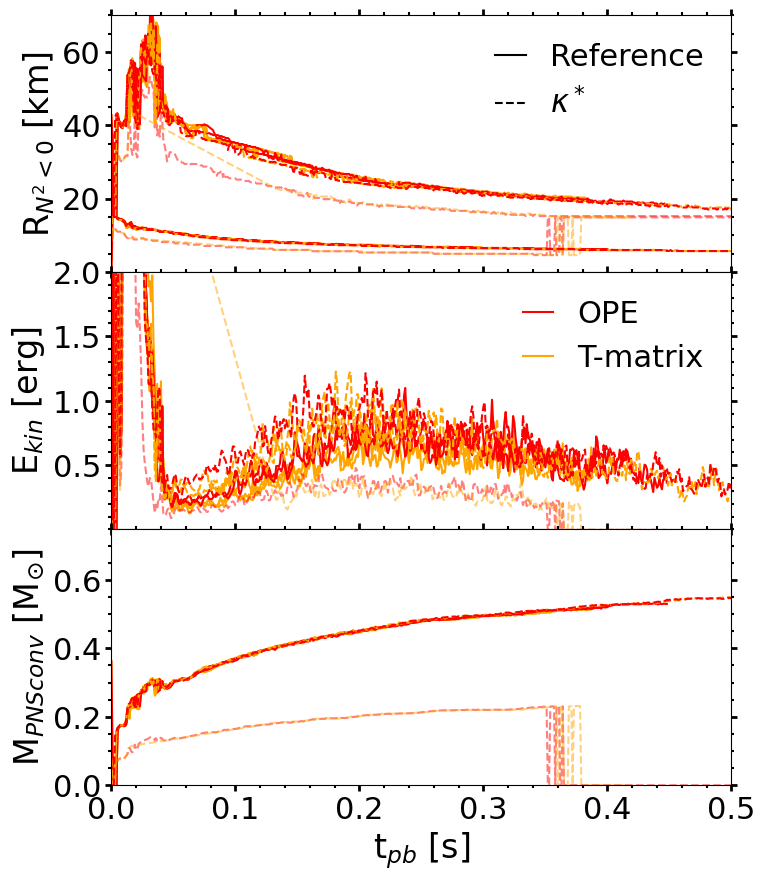

In [11]:
fig,ax=plt.subplots(3,1,figsize=(8,10))
for i in list_files:
    if not i in globals():
        continue
    globals()[i]["time"][globals()[i]["time"]==0.]=np.nan
    globals()[i]["conv_max_rad"][globals()[i]["conv_max_rad"]==0.]=np.nan
    globals()[i]["kin_erg"][globals()[i]["kin_erg"]==0.]=np.nan

    # if 'conv_min_rad' in globals()[i].keys():c
    print(i)
    time_range = np.linspace(0,len(globals()[i]["kin_erg"]),len(globals()[i]["kin_erg"]))
    time_range=(time_range-320)*1e-3
    ax[1].plot(globals()[i]["time"]-0.3,globals()[i]["kin_erg"]/1e49,color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i])    
    ax[0].plot(globals()[i]["time"]-0.3,globals()[i]["conv_max_rad"],color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i],label=i)        
    ax[0].plot(globals()[i]["time"]-0.3,globals()[i]["conv_min_rad"],color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i])
    ax[2].plot(globals()[i]["time"]-0.3,globals()[i]["total_mass"]/2e33,color=globals()['color'+i],alpha=globals()['alpha'+i],ls=globals()['ticks'+i])    

#         plt.legend()  
# ax[1].set_xlabel('t$_{pb}$ [s]',fontsize=24)
# ax[0].set_xlabel('t$_{pb}$ [s]',fontsize=24)
ax[0].set_ylabel('R$_{N^2<0}$ [km]',fontsize=24)
ax[1].set_ylabel('E$_{kin}$ [erg]',fontsize=24)
ax[2].set_xlabel('t$_{pb}$ [s]',fontsize=24)
ax[2].set_ylabel('M$_{PNS   conv}$ [M$_{\odot}$]',fontsize=24)
ax[0].set_xlim([0,0.5])
ax[1].set_xlim([0,0.5])
ax[2].set_xlim([0,0.5])
ax[1].set_ylim([0.01,2])
ax[0].set_ylim([0.01,70])

ax[2].set_ylim([0,0.75])


plt.subplots_adjust(wspace=0,hspace=0.)
ax[0].set_xticklabels([])    
ax[1].set_xticklabels([]) 
          
black_line1, = ax[0].plot([], [], color='k', linestyle='-')
black_line2, = ax[0].plot([], [], color='k', linestyle='--')
ax[0].legend([black_line1,black_line2],[r"Reference",r"$\kappa^*$"],fontsize=22,handlelength=1,frameon=False,loc= "upper right")

black_line1, = plt.plot([], [], color='r', linestyle='-')
black_line2, = plt.plot([], [], color='orange', linestyle='-')
leg=ax[1].legend([black_line1,black_line2],[r"OPE",r"T-matrix"],fontsize=22,handlelength=1,title_fontsize=22,frameon=False,loc= "upper right")

for z in range(3) : 

    ax[z].xaxis.set_minor_locator(AutoMinorLocator())
    ax[z].yaxis.set_minor_locator(AutoMinorLocator())

    ax[z].yaxis.set_ticks_position('both')
    ax[z].xaxis.set_ticks_position('both')

    ax[z].tick_params(axis='both', which='major', labelsize=22,width=2,length=4)
    ax[z].tick_params(axis='both', which='minor', labelsize=22,width=1.5,length=2)

